# Exercise 5.06 - Multi Layer Autoencoder

In this exercise we will construct a multi-layer autoencoder for the sample of the CIFAR-10 dataset, compressing the information stored within the images for later use.

Import pickle, numpy, matplotlib as well as the *Model* class from **keras.models** and *Input* and *Dense* from **keras.layers**.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.


Load the data

In [2]:
with open('data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

As this is an unsupervised learning method, we are only interested in the image data.  Load the image data as per the previous exercise.

In [3]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

Convert the image to grayscale, scale between 0 and 1 and flatten each to a single 1024 length vector.

In [4]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

Define the multi-layer autoencoder model.  We will use the same shape input as the simple autoencoder model.

In [5]:
input_layer = Input(shape=(1024,))

We will add another layer before the 256 autoencoder stage, this time with 512 neurons.

In [6]:
hidden_encoding = Dense(512, activation='relu')(input_layer)

Instructions for updating:
Colocations handled automatically by placer.


Using the same size autoencoder as the previous exercise, but this time the input to the layer is now the hidden_encoding layer.

In [7]:
encoding_stage = Dense(256, activation='relu')(hidden_encoding)

Add a decoding hidden layer

In [8]:
hidden_decoding = Dense(512, activation='relu')(encoding_stage)

Use the same output stage as in the previous exercise, this time connected to the hidden decoding stage.

In [9]:
decoding_stage = Dense(1024, activation='sigmoid')(hidden_decoding)

Construct the model by passing the first and last layers of the network to the Model class.

In [10]:
autoencoder = Model(input_layer, decoding_stage)

Compile the autoencoder using a binary cross entropy loss function and adadelta gradient descent.

In [11]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

Now let's fit the model, again we pass the images as the training data and as the desired output.  Train for 100 epochs.

In [12]:
autoencoder.fit(images, images, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6851
Epoch 2/100
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6608
Epoch 3/100
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6480
Epoch 4/100
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6380
Epoch 5/100
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6298
Epoch 6/100
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6238
Epoch 7/100
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6196
Epoch 8/100
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6155
Epoch 9/100
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6130
Epoch 10/100
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6100
Epoch 11/100
10000/10000 [==============================] - 10s 1ms/step - loss: 

Calculate and store the output of the encoding stage for the first 5 samples.

In [13]:
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

Reshape the encoder output to 16 x 16 (16 x 16 = 256) pixels and multiply by 255

In [14]:
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

Calculate and store the output of the decoding stage for the first 5 samples

In [15]:
decoder_output = autoencoder.predict(images[:5])

Reshape the output of the decoder to 32 x 32 and multiply by 255

In [16]:
decoder_output = decoder_output.reshape((-1, 32,32)) * 255

Plot the original image, the encoder output and the decoder.

In [17]:
images = images.reshape((-1, 32, 32))

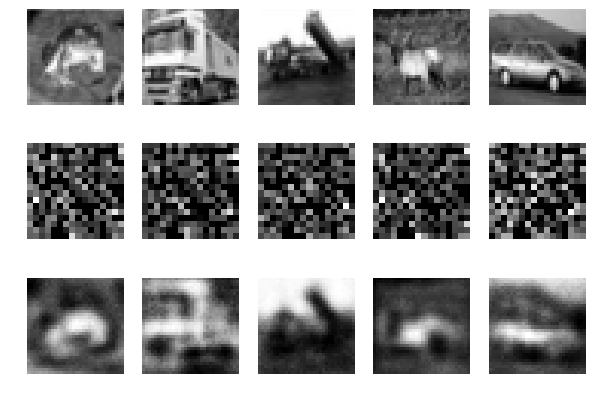

In [18]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        